<a href="https://colab.research.google.com/github/stevengregori92/Correlation-on-Many-Factors-in-Batman-s-Movies/blob/main/Use_Corr()_in_Batman's_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Import Dataset

In [2]:
data = pd.read_csv('batman_films.csv')
data

,Year,Title,Rated,Director,Released,Writer,Production,Actors,Runtime,Awards,Imdb Votes,Imdb Rating,RottenTomatoScore,Metascore
0,1989,Batman,PG-13,Tim Burton,6/23/1989,"Bob Kane (Batman characters), Sam Hamm (story)...",Warner Bros. Pictures,"Michael Keaton, Jack Nicholson, Kim Basinger, ...",126 min,Won 1 Oscar. Another 8 wins & 26 nominations.,"323,942",7.5,72%,69.0
1,1992,Batman Returns,PG-13,Tim Burton,6/19/1992,"Bob Kane (Batman characters), Daniel Waters (s...",Warner Bros. Pictures,"Michael Keaton, Danny DeVito, Michelle Pfeiffe...",126 min,Nominated for 2 Oscars. Another 2 wins & 27 no...,"261,654",7.0,79%,68.0
2,1993,Batman: Mask of the Phantasm,PG,"Eric Radomski, Bruce Timm, Kevin Altieri, Boyd...",12/25/1993,"Bob Kane (character created by: Batman), Alan ...",Warner Bros. Pictures,"Kevin Conroy, Dana Delany, Hart Bochner, Stacy...",76 min,1 nomination.,"40,226",7.8,84%,NaN
3,1995,Batman Forever,PG-13,Joel Schumacher,6/16/1995,"Bob Kane (characters), Lee Batchler (story), J...",Warner Bros. Pictures,"Val Kilmer, Tommy Lee Jones, Jim Carrey, Nicol...",121 min,Nominated for 3 Oscars. Another 10 wins & 22 n...,"226,680",5.4,39%,51.0
4,1997,Batman & Robin,PG-13,Joel Schumacher,6/20/1997,"Bob Kane (Batman characters), Akiva Goldsman",Warner Home Video,"Arnold Schwarzenegger, George Clooney, Chris O...",125 min,10 wins & 22 nominations.,"224,614",3.7,11%,28.0
5,1998,Batman & Mr. Freeze: SubZero,Unrated,Boyd Kirkland,3/17/1998,"Bob Kane (Batman created by), Randy Rogel, Boy...",Warner Bros. Pictures,"Kevin Conroy, Michael Ansara, Loren Lester, Ef...",70 min,1 win & 1 nomination.,"12,490",7.2,92%,NaN
6,2000,Batman Beyond: Return of the Joker,PG-13,Curt Geda,12/12/2000,"Bob Kane (character created by: Batman), Paul ...",Warner Home Video,"Will Friedle, Kevin Conroy, Mark Hamill, Angie...",76 min,3 wins & 5 nominations.,"22,149",7.8,90%,NaN
7,2005,Batman Begins,PG-13,Christopher Nolan,6/15/2005,"Bob Kane (characters), David S. Goyer (story),...",Warner Bros. Pictures,"Christian Bale, Michael Caine, Liam Neeson, Ka...",140 min,Nominated for 1 Oscar. Another 14 wins & 72 no...,"1,241,089",8.2,84%,70.0
8,2008,The Dark Knight,PG-13,Christopher Nolan,7/18/2008,"Jonathan Nolan (screenplay), Christopher Nolan...",Warner Bros. Pictures/Legendary,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",152 min,Won 2 Oscars. Another 153 wins & 159 nominations.,"2,173,344",9.0,94%,84.0
9,2010,Batman: Under the Red Hood,PG-13,Brandon Vietti,7/27/2010,"Judd Winick, Bob Kane (Batman created by)",Warner Bros. Pictures,"Bruce Greenwood, Jensen Ackles, John DiMaggio,...",75 min,1 nomination.,"51,426",8.0,100%,NaN


In [3]:
#data['year'] = data['Released'].dt.year
#data['month'] = data['Released'].dt.month

In [4]:
data.shape

(19, 14)

#Explore Data

In [5]:
len(data), len(data.dropna())

(19, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19 non-null     int64  
 1   Title              19 non-null     object 
 2   Rated              19 non-null     object 
 3   Director           19 non-null     object 
 4   Released           19 non-null     object 
 5   Writer             19 non-null     object 
 6   Production         19 non-null     object 
 7   Actors             19 non-null     object 
 8   Runtime            19 non-null     object 
 9   Awards             19 non-null     object 
 10  Imdb Votes         19 non-null     object 
 11  Imdb Rating        19 non-null     float64
 12  RottenTomatoScore  18 non-null     object 
 13  Metascore          9 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.2+ KB


In [7]:
data['RottenTomatoScore'] = data['RottenTomatoScore'].str.replace('%', '')
data['Runtime'] = data['Runtime'].str.replace('min', '')
data['Imdb Votes'] = data['Imdb Votes'].str.replace(',', '')
data.head()

,Year,Title,Rated,Director,Released,Writer,Production,Actors,Runtime,Awards,Imdb Votes,Imdb Rating,RottenTomatoScore,Metascore
0,1989,Batman,PG-13,Tim Burton,6/23/1989,"Bob Kane (Batman characters), Sam Hamm (story)...",Warner Bros. Pictures,"Michael Keaton, Jack Nicholson, Kim Basinger, ...",126,Won 1 Oscar. Another 8 wins & 26 nominations.,323942,7.5,72,69.0
1,1992,Batman Returns,PG-13,Tim Burton,6/19/1992,"Bob Kane (Batman characters), Daniel Waters (s...",Warner Bros. Pictures,"Michael Keaton, Danny DeVito, Michelle Pfeiffe...",126,Nominated for 2 Oscars. Another 2 wins & 27 no...,261654,7.0,79,68.0
2,1993,Batman: Mask of the Phantasm,PG,"Eric Radomski, Bruce Timm, Kevin Altieri, Boyd...",12/25/1993,"Bob Kane (character created by: Batman), Alan ...",Warner Bros. Pictures,"Kevin Conroy, Dana Delany, Hart Bochner, Stacy...",76,1 nomination.,40226,7.8,84,NaN
3,1995,Batman Forever,PG-13,Joel Schumacher,6/16/1995,"Bob Kane (characters), Lee Batchler (story), J...",Warner Bros. Pictures,"Val Kilmer, Tommy Lee Jones, Jim Carrey, Nicol...",121,Nominated for 3 Oscars. Another 10 wins & 22 n...,226680,5.4,39,51.0
4,1997,Batman & Robin,PG-13,Joel Schumacher,6/20/1997,"Bob Kane (Batman characters), Akiva Goldsman",Warner Home Video,"Arnold Schwarzenegger, George Clooney, Chris O...",125,10 wins & 22 nominations.,224614,3.7,11,28.0


In [39]:
data.groupby('Director').mean().sort_values('Imdb Rating', ascending = False)

,Year,Runtime,Imdb Votes,Imdb Rating,RottenTomatoScore,Metascore,Overall Rating
Director,,,,,,,
Christopher Nolan,2008.333333,152.0,1618076.0,8.533333,88.333333,77.333333,58.066667
Tim Burton,1990.500000,126.0,292798.0,7.250000,75.500000,68.500000,50.416667
Zack Snyder,2016.500000,135.5,474591.5,6.450000,34.000000,44.500000,28.316667
Joel Schumacher,1996.000000,123.0,225647.0,4.550000,25.000000,39.500000,23.016667


In [8]:
data = data.dropna()

In [9]:
data[['RottenTomatoScore', 'Runtime', 'Imdb Votes']] = data[['RottenTomatoScore', 'Runtime', 'Imdb Votes']].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 17
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9 non-null      int64  
 1   Title              9 non-null      object 
 2   Rated              9 non-null      object 
 3   Director           9 non-null      object 
 4   Released           9 non-null      object 
 5   Writer             9 non-null      object 
 6   Production         9 non-null      object 
 7   Actors             9 non-null      object 
 8   Runtime            9 non-null      float64
 9   Awards             9 non-null      object 
 10  Imdb Votes         9 non-null      float64
 11  Imdb Rating        9 non-null      float64
 12  RottenTomatoScore  9 non-null      float64
 13  Metascore          9 non-null      float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ KB


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
data['Overall Rating'] = data[['Metascore', 'RottenTomatoScore', 'Imdb Rating']].mean(axis=1)
data.head()

<ipython-input-10-f57ead183fad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Overall Rating'] = data[['Metascore', 'RottenTomatoScore', 'Imdb Rating']].mean(axis=1)


,Year,Title,Rated,Director,Released,Writer,Production,Actors,Runtime,Awards,Imdb Votes,Imdb Rating,RottenTomatoScore,Metascore,Overall Rating
0,1989,Batman,PG-13,Tim Burton,6/23/1989,"Bob Kane (Batman characters), Sam Hamm (story)...",Warner Bros. Pictures,"Michael Keaton, Jack Nicholson, Kim Basinger, ...",126.0,Won 1 Oscar. Another 8 wins & 26 nominations.,323942.0,7.5,72.0,69.0,49.500000
1,1992,Batman Returns,PG-13,Tim Burton,6/19/1992,"Bob Kane (Batman characters), Daniel Waters (s...",Warner Bros. Pictures,"Michael Keaton, Danny DeVito, Michelle Pfeiffe...",126.0,Nominated for 2 Oscars. Another 2 wins & 27 no...,261654.0,7.0,79.0,68.0,51.333333
3,1995,Batman Forever,PG-13,Joel Schumacher,6/16/1995,"Bob Kane (characters), Lee Batchler (story), J...",Warner Bros. Pictures,"Val Kilmer, Tommy Lee Jones, Jim Carrey, Nicol...",121.0,Nominated for 3 Oscars. Another 10 wins & 22 n...,226680.0,5.4,39.0,51.0,31.800000
4,1997,Batman & Robin,PG-13,Joel Schumacher,6/20/1997,"Bob Kane (Batman characters), Akiva Goldsman",Warner Home Video,"Arnold Schwarzenegger, George Clooney, Chris O...",125.0,10 wins & 22 nominations.,224614.0,3.7,11.0,28.0,14.233333
7,2005,Batman Begins,PG-13,Christopher Nolan,6/15/2005,"Bob Kane (characters), David S. Goyer (story),...",Warner Bros. Pictures,"Christian Bale, Michael Caine, Liam Neeson, Ka...",140.0,Nominated for 1 Oscar. Another 14 wins & 72 no...,1241089.0,8.2,84.0,70.0,54.066667


In [11]:
data.corr()['Overall Rating'].sort_values(ascending = False)

Overall Rating       1.000000
RottenTomatoScore    0.997330
Metascore            0.993930
Imdb Rating          0.932066
Imdb Votes           0.700143
Runtime              0.490785
Year                -0.041795
Name: Overall Rating, dtype: float64

In [12]:
data.corr()['Imdb Rating'].sort_values(ascending = False)

Imdb Rating          1.000000
Overall Rating       0.932066
Metascore            0.931896
RottenTomatoScore    0.919027
Imdb Votes           0.772131
Runtime              0.629101
Year                 0.260214
Name: Imdb Rating, dtype: float64

In [13]:
data.corr()['Runtime'].sort_values(ascending = False)

Runtime              1.000000
Imdb Votes           0.786934
Imdb Rating          0.629101
Year                 0.548252
Metascore            0.522241
Overall Rating       0.490785
RottenTomatoScore    0.458924
Name: Runtime, dtype: float64

In [14]:
data.corr()['Imdb Votes'].sort_values(ascending = False)

Imdb Votes           1.000000
Runtime              0.786934
Imdb Rating          0.772131
Metascore            0.715017
Overall Rating       0.700143
RottenTomatoScore    0.679983
Year                 0.431189
Name: Imdb Votes, dtype: float64

In [15]:
data.corr()['Metascore'].sort_values(ascending = False)

Metascore            1.000000
Overall Rating       0.993930
RottenTomatoScore    0.983539
Imdb Rating          0.931896
Imdb Votes           0.715017
Runtime              0.522241
Year                -0.041481
Name: Metascore, dtype: float64

#Data Visulize

<AxesSubplot:>

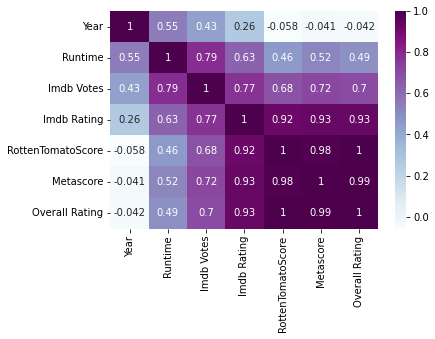

In [16]:
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')

<AxesSubplot:xlabel='Overall Rating', ylabel='Metascore'>

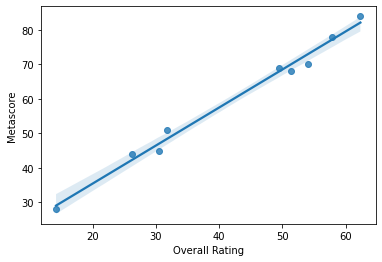

In [17]:
sns.regplot(x = 'Overall Rating', y = 'Metascore', data = data)

<AxesSubplot:xlabel='Overall Rating', ylabel='RottenTomatoScore'>

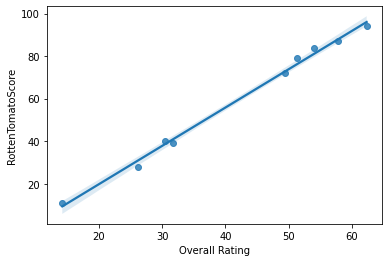

In [18]:
sns.regplot(x = 'Overall Rating', y = 'RottenTomatoScore', data = data)

<AxesSubplot:xlabel='Overall Rating', ylabel='Imdb Rating'>

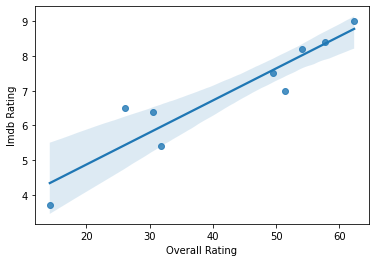

In [30]:
sns.regplot(x = 'Overall Rating', y = 'Imdb Rating', data = data)

<AxesSubplot:xlabel='Overall Rating', ylabel='Imdb Votes'>

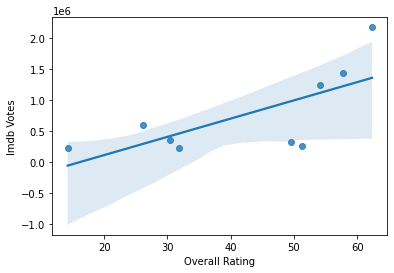

In [31]:
sns.regplot(x = 'Overall Rating', y = 'Imdb Votes', data = data)

<AxesSubplot:xlabel='Overall Rating', ylabel='Runtime'>

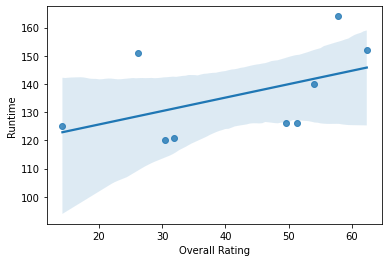

In [32]:
sns.regplot(x = 'Overall Rating', y = 'Runtime', data = data)

<AxesSubplot:xlabel='Year', ylabel='Overall Rating'>

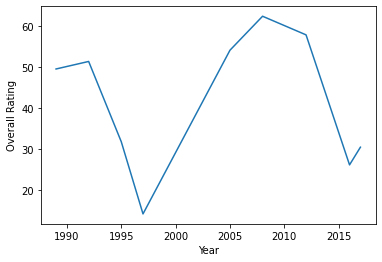

In [28]:
sns.lineplot(x = 'Year', y = 'Overall Rating', data=data)

<AxesSubplot:xlabel='Year', ylabel='Overall Rating'>

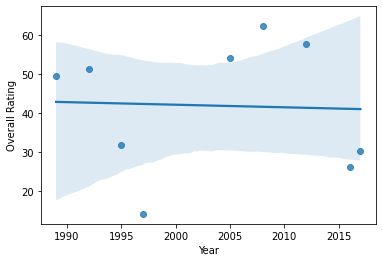

In [27]:
sns.regplot(x = 'Year', y = 'Overall Rating', data=data)

<AxesSubplot:xlabel='Director', ylabel='Overall Rating'>

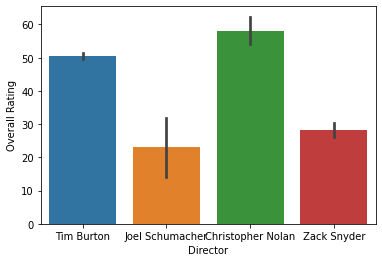

In [40]:
sns.barplot(x = 'Director', y = 'Overall Rating', data = data)

#Report

Insights:
- Overall rating has a very high correlation above 50% with Metascore, RottenTomatoScore, Imdb Rating, Imdb Votes.
- Overall rating has correlation around 50% with Runtime
- Overall rating is going upside down in the last 30 years. In prediction, Batman movies' rating will go downwards slowly.
- The highest Batman movies' rating was directed by Christopher Nolan.
- The lowest Batman movies' rating was directed by Joel Schumacher. 

Conclution: Batmam movies's rating in the last 30 years was highly influenced with some factors suct as Metascore, RottentomatoScore, Imdb Rating, Imdb vote, and Director. 